<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/starter_slogan_dataset_ffa80249_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook explores the slogans data.

## Exploratory Analysis


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


Getting the data into a dataframe

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file
# sloganlist.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('sloganlist.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'sloganlist.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1162 rows and 2 columns


Let's take a quick look at what the data looks like:

In [ ]:
df.head(5)

,Company,Slogan
0,Costa Coffee,For coffee lovers.
1,Evian,Evian. Live young.
2,Dasani,Designed to make a difference.
3,Heineken,It's all about the beer.
4,Gatorade,The Legend Continues.


In [ ]:
#checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  1162 non-null   object
 1   Slogan   1162 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB


Looks like no missing values, let's check duplicates

In [ ]:
duplicate = df[df.duplicated('Company')]
  
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,Company,Slogan
26,Heineken,It's all about the beer.
27,Gatorade,The Legend Continues.
60,Colgate,"Stronger, healthier gums."
61,Fanta,"Drink Fanta, stay Bamboocha."
62,Pizza Hut,Make it great.
...,...,...
1157,Levi's Jeans,Original jeans. original people.
1158,Dove (toiletries),The secret of beautiful hair.
1159,Lipton,Be more tea.
1160,Pampers,Discover your babyâs world.


In [ ]:
df.loc[df['Company'] == 'Colgate']

,Company,Slogan
20,Colgate,"Stronger, healthier gums."
60,Colgate,"Stronger, healthier gums."
100,Colgate,"Stronger, healthier gums."
140,Colgate,"Stronger, healthier gums."
180,Colgate,"Stronger, healthier gums."
220,Colgate,"Stronger, healthier gums."
260,Colgate,"Stronger, healthier gums."
300,Colgate,"Stronger, healthier gums."
340,Colgate,"Stronger, healthier gums."
380,Colgate,"Stronger, healthier gums."


Looks like a lots of classic duplicates, lets remove all such cases

In [ ]:
df = df.drop_duplicates(keep=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 1141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  549 non-null    object
 1   Slogan   549 non-null    object
dtypes: object(2)
memory usage: 12.9+ KB


that's almost half the rows!

In [ ]:
df.head(5)

,Company,Slogan
0,Costa Coffee,For coffee lovers.
1,Evian,Evian. Live young.
2,Dasani,Designed to make a difference.
5,TÃ­o Pepe,Good food tastes better after a glass of Tio Pepe
6,Tetley's Brewery,Don't Do Things By Halves.


Is there are more than one slogan for a company?

Is there same slogan for two companies?

In [ ]:
# on 'Company' column
duplicate = df[df.duplicated('Company')]
  
print("Duplicate Rows based on Company :")
duplicate 

Duplicate Rows based on Company :


,Company,Slogan


In [ ]:
# on 'Slogan' column
duplicate = df[df.duplicated('Slogan')]
  
print("Duplicate Rows based on Slogan :")
duplicate 

Duplicate Rows based on Slogan :


,Company,Slogan
448,Stolichnaya vodka,Exquisite wodka.


In [ ]:
df.loc[df['Slogan'] == 'Exquisite wodka.']

,Company,Slogan
334,Wyborowa Vodka,Exquisite wodka.
448,Stolichnaya vodka,Exquisite wodka.


Well, which one to keep? Since, I have no idea about the alcohols and google isn't much help. I am dropping both the rows. Normally, Would ask someone else or report it be inconsistent or of both are same, update it.

In [ ]:
df = df[df.Slogan != "Exquisite wodka."]

Well, Now let's find out for each company how long a slogan is.

For that, count the number of words in a slogan.

In [ ]:
#keep the number of wrods in a column

df['Number_of_words'] =  df['Slogan'].apply(lambda x: len(x.split()))

In [ ]:
df.head(5)

,Company,Slogan,Number_of_words
0,Costa Coffee,For coffee lovers.,3
1,Evian,Evian. Live young.,3
2,Dasani,Designed to make a difference.,5
5,TÃ­o Pepe,Good food tastes better after a glass of Tio Pepe,10
6,Tetley's Brewery,Don't Do Things By Halves.,5


Let's first see the range of number of words

In [ ]:
df['Number_of_words'].describe()

count    547.000000
mean       4.170018
std        1.483232
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: Number_of_words, dtype: float64

Longest slogan has 10 words and shortest has 2. 

On average there are 4 words in a slogan.

Most slogans have 3-5 words.

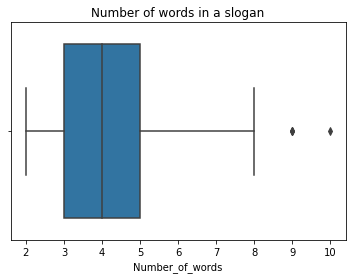

In [ ]:
ax = sns.boxplot(x=df["Number_of_words"]).set_title('Number of words in a slogan')

Boxplot shows that slogans with 9 and 10 words are rare.

Let's see some common words in a slogan. This can be tricky because slogans are from various domains.

For starters let's see most common words with a word cloud.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

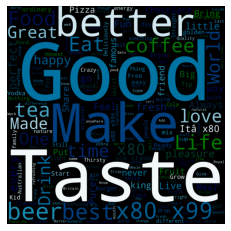

In [ ]:
#getting stops words like is, are am etc.
stopwords = set(STOPWORDS)

#reading all the slogans into a single file
text = df['Slogan'].values 

wordcloud = WordCloud(stopwords = stopwords,colormap="ocean",width = 1600, height = 1600).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Words like, Make, Good, better, great,best happy,love, fun makes sense.

Lets find it in a list with frequencies

In [ ]:
import collections

In [ ]:
#updating stop word list
#stopwords = stopwords.union(set(['the','it','a'])) #not updating it as of now


#get all the slogans
raw = df['Slogan'].values 

wordcount = {}

for word in str(raw).lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("'","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


In [ ]:
# Print 30 most common word
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(30):
    print(word, ": ", count)

good :  30
taste :  22
better :  20
beer :  16
make :  14
best :  14
tea :  13
coffee :  12
food :  11
eat :  11
love :  10
great :  9
life :  9
time :  8
drink :  8
world :  8
made :  8
perfect :  8
fresh :  8
one :  8
happy :  8
every :  7
go :  7
live :  6
tastes :  6
little :  6
always :  6
pure :  6
100% :  6
pleasure :  6


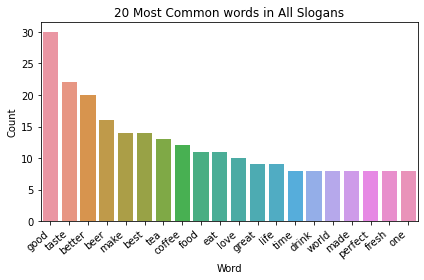

In [ ]:
#plottting 20 most commons
lst = word_counter.most_common(20)
df_word_count = pd.DataFrame(lst, columns = ['Word', 'Count'])
ax = sns.barplot(x="Word", y="Count", data=df_word_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('20 Most Common words in All Slogans')
plt.tight_layout()
plt.show()

Looks like every company is trying to "Good" very often!

## Conclusion
